## Importing Libraries

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Reading Data

In [13]:
data = pd.read_csv('train.csv')
data.tail(20)

,id,keyword,location,text,target
7593,10848,NaN,NaN,I just heard a really loud bang and everyone i...,0
7594,10849,NaN,NaN,A gas thing just exploded and I heard screams ...,1
7595,10850,NaN,NaN,NWS: Flash Flood Warning Continued for Shelby ...,1
7596,10851,NaN,NaN,RT @LivingSafely: #NWS issues Severe #Thunders...,1
7597,10852,NaN,NaN,#??? #?? #??? #??? MH370: Aircraft debris foun...,1
7598,10853,NaN,NaN,Father-of-three Lost Control of Car After Over...,1
7599,10854,NaN,NaN,1.3 #Earthquake in 9Km Ssw Of Anza California ...,1
7600,10855,NaN,NaN,Evacuation order lifted for town of Roosevelt:...,1
7601,10859,NaN,NaN,#breaking #LA Refugio oil spill may have been ...,1
7602,10860,NaN,NaN,a siren just went off and it wasn't the Forney...,1


## Dropping Useless Columns

In [14]:
data.drop(['id','keyword','location'],axis=1,inplace=True)

In [15]:
data

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7608,Two giant cranes holding a bridge collapse int...,1
7609,@aria_ahrary @TheTawniest The out of control w...,1
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,Police investigating after an e-bike collided ...,1


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7613 non-null   object
 1   target  7613 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 119.1+ KB


#### There are no missing values

## Checking the Balance of the Data

/home/ayman/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


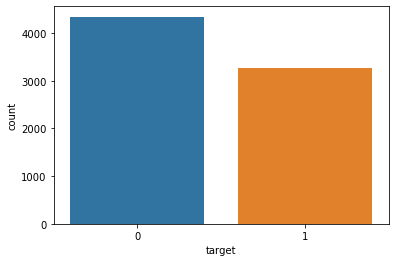

In [17]:
sns.countplot(data['target'])

In [18]:
data['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

# Preprocessing Tweets

In [19]:
tweets = np.array(data['text'])
tweets[13]

'#Flood in Bago Myanmar #We arrived Bago'

## Cleaning Tweets

In [20]:
import re
def clean_text(text):
  text = re.sub(r'@\w*','',text) #Remove Mentions
  text = re.sub(r'https?:\S*','',text) #Remove Links
  text = re.sub(r'\d*','',text) #Remove Numbers
  text = re.sub(r'\W+',' ',text) #Remove Symbols

  return text

In [21]:
clean_tweets = []
for tweet in tweets:
  clean_tweets.append(clean_text(tweet))

In [22]:
clean_tweets[13]

' Flood in Bago Myanmar We arrived Bago'

## Splitting Tweets

In [23]:
split_tweets = []
for tweet in clean_tweets:
  split_tweets.append(tweet.split())

In [24]:
split_tweets[10]

['Three', 'people', 'died', 'from', 'the', 'heat', 'wave', 'so', 'far']

## Most Common Stop Words

In [25]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/ayman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
sw = []
for i in split_tweets:
    for j in i:
        if j in stop_words:
            sw.append(j)

In [27]:
df = pd.DataFrame(sw)
df

,0
0,are
1,the
2,of
3,this
4,all
...,...
31666,an
31667,with
31668,a
31669,in


In [28]:
df.value_counts()

the          2603
a            1887
to           1819
in           1783
of           1738
             ... 
nor             2
ourselves       2
ma              1
theirs          1
hadn            1
Length: 147, dtype: int64

## Most Common Words

In [29]:
w = []
for i in split_tweets:
    for j in i:
        if j not in stop_words:
            w.append(j)

In [30]:
df = pd.DataFrame(w)
df

,0
0,Our
1,Deeds
2,Reason
3,earthquake
4,May
...,...
74253,Northern
74254,California
74255,Wildfire
74256,ABC


In [31]:
df.value_counts()

I            1625
The           587
Û_            344
amp           344
A             331
             ... 
Silas           1
Silence         1
Silverman       1
Simmering       1
åÊM             1
Length: 18176, dtype: int64

## Remove Stop Words

In [32]:
def remove_stopwords(words): 
  Words = []
  for word in words:
    if word not in stop_words:
      Words.append(word)
  return Words

In [33]:
tweets = []
for tweet in split_tweets:
  tweets.append(remove_stopwords(tweet))

In [34]:
tweets[6020]

['u',
 'better',
 'learn',
 'derivative',
 'formula',
 'seismic',
 'rather',
 'thinking',
 'things',
 'like',
 'things',
 'like',
 'Haha']

## Nouns, Verbs, Adjective, and, Adverbs ONLY

In [35]:
tweet = []
for i in tweets:
    t = nltk.pos_tag(i)
    i = []
    for j in t:
        if j[1][0] in ['N','V','J','R']:
            i.append(j[0])
    tweet.append(i)    

In [36]:
tweet[0]

['Deeds', 'Reason', 'earthquake', 'May', 'ALLAH', 'Forgive']

### Converting words to their Roots

In [37]:
from nltk.stem.snowball import SnowballStemmer
snow_stemmer = SnowballStemmer(language='english')
for i in range(len(tweet)):
  for j in range(len(tweet[i])):
    tweet[i][j] = snow_stemmer.stem(tweet[i][j])

In [38]:
tweet[6020]

['u',
 'better',
 'learn',
 'deriv',
 'formula',
 'seismic',
 'rather',
 'think',
 'thing',
 'thing',
 'haha']

### Token the Tweets

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweet)
tweets = tokenizer.texts_to_sequences(tweet)

2022-07-27 23:13:10.124066: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ayman/hector_ws/devel/lib:/home/ayman/catkin_ws/devel/lib:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu
2022-07-27 23:13:10.124090: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [40]:
tweets[1]

[147, 1, 677, 5143, 5144, 1087]

### Padding

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
tweets = pad_sequences(tweets)
tweets[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,  147,    1,  677, 5143, 5144,
       1087], dtype=int32)

## Splitting

In [83]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(tweets,data['target'],test_size=0.1)

## LSTM Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional

model = Sequential()

model.add(Embedding(len(tokenizer.word_index)+1,10,input_length=23))
model.add(Bidirectional(LSTM(units=1)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 23, 10)            128190    
                                                                 
 bidirectional_7 (Bidirectio  (None, 2)                96        
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 2)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 128,289
Trainable params: 128,289
Non-trainable params: 0
_________________________________________________________________


In [73]:
model.compile(loss="binary_crossentropy",optimizer='RMSprop',metrics=['accuracy'])

In [74]:
history = model.fit(train_x,train_y,validation_split=0.2,verbose=1,epochs=8)

Epoch 1/8
172/172 [==============================] - 5s 11ms/step - loss: 0.6706 - accuracy: 0.5752 - val_loss: 0.6451 - val_accuracy: 0.5959
Epoch 2/8
172/172 [==============================] - 1s 8ms/step - loss: 0.6252 - accuracy: 0.6533 - val_loss: 0.5997 - val_accuracy: 0.7236
Epoch 3/8
172/172 [==============================] - 1s 8ms/step - loss: 0.5633 - accuracy: 0.7462 - val_loss: 0.5538 - val_accuracy: 0.7717
Epoch 4/8
172/172 [==============================] - 1s 8ms/step - loss: 0.5098 - accuracy: 0.7845 - val_loss: 0.5156 - val_accuracy: 0.7877
Epoch 5/8
172/172 [==============================] - 1s 8ms/step - loss: 0.4673 - accuracy: 0.7962 - val_loss: 0.4907 - val_accuracy: 0.8016
Epoch 6/8
172/172 [==============================] - 1s 8ms/step - loss: 0.4305 - accuracy: 0.8091 - val_loss: 0.4790 - val_accuracy: 0.8009
Epoch 7/8
172/172 [==============================] - 1s 8ms/step - loss: 0.4089 - accuracy: 0.8064 - val_loss: 0.4669 - val_accuracy: 0.8053
Epoch 8/8
17

### Plotting Accuracy

Text(0.5, 0, 'epochs')

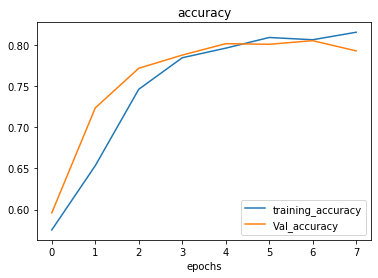

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training_accuracy','Val_accuracy'])
plt.title('accuracy')
plt.xlabel('epochs')

Text(0.5, 0, 'epochs')

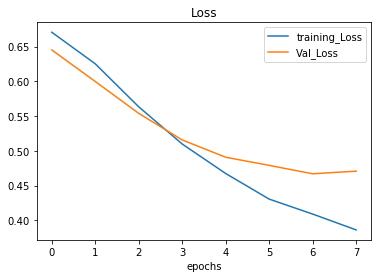

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training_Loss','Val_Loss'])
plt.title('Loss')
plt.xlabel('epochs')

## Model Evaluation

In [87]:
model.evaluate(test_x,test_y)

24/24 [==============================] - 0s 4ms/step - loss: 0.3673 - accuracy: 0.8609


[0.3672895133495331, 0.8608924150466919]

## Save Model

In [96]:
model.save('Pred_Disaster_Tweet.h5')